In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import networkx as nx
import operator, math, random

In [2]:
connecticut = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}
print connecticut

{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


In [3]:
def draw_map( planar_map, size, color_assignments = None):
    def as_dictionary( a_list ):
        dct = {}
        for i, e in enumerate( a_list ):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(planar_map["nodes"])
    pos = as_dictionary(planar_map["coordinates"])
        
    nodes = [n for n in range(0, len(planar_map["nodes"]))]

    if color_assignments:
        colors = []
        for node in nodes:
            colors.append(color_assignments[node])
    else:
        colors = ['red' for c in range(0,len(planar_map["nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(planar_map["edges"])

    plt.figure( figsize=size, dpi=600)

    nx.draw( G, node_color = colors, with_labels = True, labels = labels, pos = pos)

Using this function, we can draw `connecticut`:

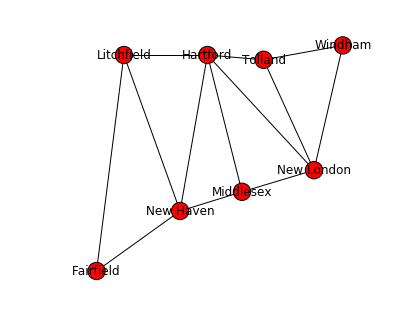

In [4]:
draw_map( connecticut, (5,4))

Of course, you can see the problem here! They're all red which is what you need to fix. We can do something similar for Europe:

In [5]:
europe = {
    "nodes":  ["Iceland", "Ireland", "United Kingdom", "Portugal", "Spain",
                 "France", "Belgium", "Netherlands", "Luxembourg", "Germany",
                 "Denmark", "Norway", "Sweden", "Finland", "Estonia",
                 "Latvia", "Lithuania", "Poland", "Czech Republic", "Austria",
                 "Liechtenstein", "Switzerland", "Italy", "Malta", "Greece",
                 "Albania", "Macedonia", "Kosovo", "Montenegro", "Bosnia Herzegovina",
                 "Serbia", "Croatia", "Slovenia", "Hungary", "Slovakia",
                 "Belarus", "Ukraine", "Moldova", "Romania", "Bulgaria",
                 "Cyprus", "Turkey", "Georgia", "Armenia", "Azerbaijan",
                 "Russia" ], 
    "edges": [(0,1), (0,2), (1,2), (2,5), (2,6), (2,7), (2,11), (3,4),
                 (4,5), (4,22), (5,6), (5,8), (5,9), (5,21), (5,22),(6,7),
                 (6,8), (6,9), (7,9), (8,9), (9,10), (9,12), (9,17), (9,18),
                 (9,19), (9,21), (10,11), (10,12), (10,17), (11,12), (11,13), (11,45), 
                 (12,13), (12,14), (12,15), (12,17), (13,14), (13,45), (14,15),
                 (14,45), (15,16), (15,35), (15,45), (16,17), (16,35), (17,18),
                 (17,34), (17,35), (17,36), (18,19), (18,34), (19,20), (19,21), 
                 (19,22), (19,32), (19,33), (19,34), (20,21), (21,22), (22,23),
                 (22,24), (22,25), (22,28), (22,29), (22,31), (22,32), (24,25),
                 (24,26), (24,39), (24,40), (24,41), (25,26), (25,27), (25,28),
                 (26,27), (26,30), (26,39), (27,28), (27,30), (28,29), (28,30),
                 (29,30), (29,31), (30,31), (30,33), (30,38), (30,39), (31,32),
                 (31,33), (32,33), (33,34), (33,36), (33,38), (34,36), (35,36),
                 (35,45), (36,37), (36,38), (36,45), (37,38), (38,39), (39,41),
                 (40,41), (41,42), (41,43), (41,44), (42,43), (42,44), (42,45),
                 (43,44), (44,45)],
    "coordinates": [( 18,147), ( 48, 83), ( 64, 90), ( 47, 28), ( 63, 34),
                   ( 78, 55), ( 82, 74), ( 84, 80), ( 82, 69), (100, 78),
                   ( 94, 97), (110,162), (116,144), (143,149), (140,111),
                   (137,102), (136, 95), (122, 78), (110, 67), (112, 60),
                   ( 98, 59), ( 93, 55), (102, 35), (108, 14), (130, 22),
                   (125, 32), (128, 37), (127, 40), (122, 42), (118, 47),
                   (127, 48), (116, 53), (111, 54), (122, 57), (124, 65),
                   (146, 87), (158, 65), (148, 57), (138, 54), (137, 41),
                   (160, 13), (168, 29), (189, 39), (194, 32), (202, 33),
                   (191,118)]}
print europe

{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 

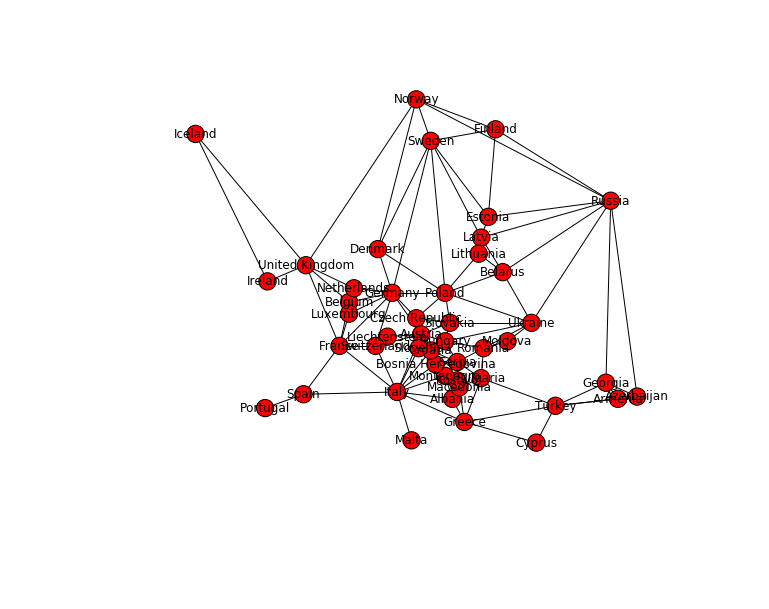

In [6]:
draw_map( europe, (10, 8))

Function convert_draw_map is used to convert {node:color} format to [(node,color)] format so that it's able to draw the color map using draw_map function.

In [7]:
def convert_draw_map(planar_map, color_map):
    draw_map = []
    if color_map:
        for node in planar_map["nodes"]:
            draw_map.append((node, color_map[node]))
    return draw_map

### Function color_map is used to solve the CSP map coloring problem. The planar_map has the format described above, colors is a list of strings denoting the colors to use, and trace is a flag for setting the debugging trace. The function returns a dictionary {node:color} if it found the solution; otherwise, it returns None. 
### color_map uses the following methods to solve the CSP map coloring problem:
- Backtracking: implemented by function back_tracking()
- Forward checking: implemented by function forward_checking()
- Minimum remaining values: implemented by function get_unset_node()
- Least contraining value: implemented by functions get_order_color_domain() and get_num_conflicts()
- Note: Minimum remainning values heuristic is chosen for the function color_map instead of degree heuristic.

In [8]:
def color_map(planar_map, colors, trace=False):
    color_map = {}
    color_domains = {}
    nodes = planar_map["nodes"]
    edges = planar_map["edges"]
    neighbors = {}
    for node in nodes:
        color_domains[node] = colors
        neighbors[node] = []
    for e in edges:
        neighbors[nodes[e[0]]].append(nodes[e[1]])
        neighbors[nodes[e[1]]].append(nodes[e[0]])
        
    tracking_color_domains, trimmed_color_domains = {}, {}
    for node in nodes:
        tracking_color_domains[node] = color_domains[node][:]
        trimmed_color_domains[node] = []
    #back_tracking function which picks colors and set/unset colors from nodes    
    def back_tracking():
        if len(color_map) == len(nodes):
            return color_map
        node = get_unset_node()
        for color in get_order_color_domain(neighbors[node], tracking_color_domains[node]):
            if get_num_conflicts(color, neighbors[node]) == 0:
                set_color(node, color)
                if trace: print "start back tracking from " + str(node)
                ret_color_map = back_tracking()
                if ret_color_map is not None:
                    return ret_color_map
            if trace: print "remove color " + str(color) + " from " + str(node)
            unset_color(node)
        return None
    #get_unset_node function gets unset nodes using minimum remaining values.
    #If nodes have same minimum remaining value, function will pick randomly
    def get_unset_node():
        unset_nodes = [node for node in nodes if node not in color_map] 
        min_value = len(tracking_color_domains[unset_nodes[0]])
        rand = 0
        for node in unset_nodes:
            value = len(tracking_color_domains[node])
            if value < min_value:
                min_node, min_value = node, value
                rand = 1
            elif value == min_value:
                rand += 1
                if random.randrange(rand) == 0:
                    min_node = node
        return min_node
    #get_order_color_domain returns colors with least contraining value
    def get_order_color_domain(neighbor, tracking_color_domain):
        tracking_color_domain.sort(key=lambda color: get_num_conflicts(color, neighbor))
        while tracking_color_domain:
            yield tracking_color_domain.pop()
    #get_num_conflicts returns number of nodes that having conflict with the node (same color)
    def get_num_conflicts(color, neighbor):
        num = 0
        for node2 in neighbor:
            color2 = color_map.get(node2, None)
            if color2 != None and not color!=color2:
                num += 1
        return num
    #set_color is used to set the color to the node
    def set_color(node, color):
        color_map[node] = color
        forward_checking(node, color)
    #unset_color is used to unset the color from the node
    def unset_color(node):
        if node in color_map:
            tracking_color_domains[node] = color_domains[node][:]
            del color_map[node]
    #forward_checking is used to remove the same color from neighbors of the node
    def forward_checking(node, color):
        for (n, c) in trimmed_color_domains[node]:
            tracking_color_domains[n].append(c)
        trimmed_color_domains[node] = []
        for n in neighbors[node]:
            if n not in color_map:
                for c in tracking_color_domains[n][:]:
                    if not color!=c:
                        tracking_color_domains[n].remove(c)
                        trimmed_color_domains[node].append((n, c))
        
    return convert_draw_map(planar_map, back_tracking())

### color_map2() function uses minimum conflicts algorithm to solve CSP map coloring problem. Minimum conflicts algorithm is more effective to solve map coloring problem.

In [9]:
def color_map2(planar_map, colors, trace=False, max_tries=1000000): 
    color_map = {}
    color_domains = {}
    nodes = planar_map["nodes"]
    edges = planar_map["edges"]
    neighbors = {}
    for node in nodes:
        color_domains[node] = colors
        neighbors[node] = []
    for e in edges:
        neighbors[nodes[e[0]]].append(nodes[e[1]])
        neighbors[nodes[e[1]]].append(nodes[e[0]])
    def set_color(node, color, color_map):
        color_map[node] = color

    def unset_color(node, color_map):
        if node in color_map:
            del color_map[node]
            
    def get_num_conflicts(color, neighbor, color_map):
        num = 0
        for node2 in neighbor:
            color2 = color_map.get(node2, None)
            if color2 != None and not color!=color2:
                num += 1
        return num
            
    def get_min_conflicted_color(color_domain, neighbor, color_map):
        min_value = get_num_conflicts(color_domain[0], neighbor, color_map)
        rand = 0
        for color in color_domain:
            value = get_num_conflicts(color, neighbor, color_map)
            if value < min_value:
                min_color, min_value = color, value
                rand = 1
            elif value == min_value: 
                rand += 1
                if random.randrange(rand) == 0:
                    min_color = color
        return min_color
            
    for node in nodes:
        color = get_min_conflicted_color(color_domains[node], neighbors[node], color_map)
        set_color(node, color, color_map)
    print color_map
    for i in range(max_tries):
        conflicted_nodes = [node for node in nodes
                if get_num_conflicts(color_map[node], neighbors[node], color_map) > 0]
        if not conflicted_nodes:
            return convert_draw_map(planar_map, color_map)
        node = random.choice(conflicted_nodes)
        color = get_min_conflicted_color(color_domains[node], neighbors[node], color_map)
        if trace: print "Try to reset node " + str(node) + " to color " + str(color)
        set_color(node, color, color_map)
    print "Can't find the solution"
    return None

[('Fairfield', 'yellow'), ('Litchfield', 'green'), ('New Haven', 'blue'), ('Hartford', 'yellow'), ('Middlesex', 'green'), ('Tolland', 'green'), ('New London', 'blue'), ('Windham', 'yellow')]


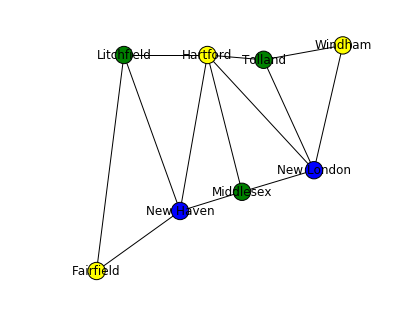

In [10]:
connecticut_colors = color_map( connecticut, ["red", "blue", "green", "yellow"])
print connecticut_colors
draw_map(connecticut, (5,4), [color[1] for color in connecticut_colors])

{'New London': 'blue', 'New Haven': 'yellow', 'Middlesex': 'green', 'Litchfield': 'blue', 'Fairfield': 'green', 'Tolland': 'yellow', 'Windham': 'red', 'Hartford': 'red'}


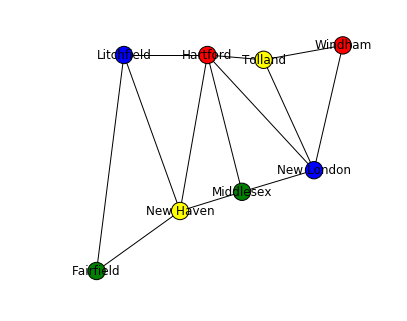

In [11]:
connecticut_colors = color_map2( connecticut, ["red", "blue", "green", "yellow"])
draw_map(connecticut, (5,4), [color[1] for color in connecticut_colors])

start back tracking from Middlesex
start back tracking from New Haven
start back tracking from Hartford
start back tracking from Litchfield
start back tracking from New London
start back tracking from Fairfield
start back tracking from Tolland
start back tracking from Windham
[('Fairfield', 'red'), ('Litchfield', 'green'), ('New Haven', 'blue'), ('Hartford', 'red'), ('Middlesex', 'green'), ('Tolland', 'green'), ('New London', 'blue'), ('Windham', 'red')]


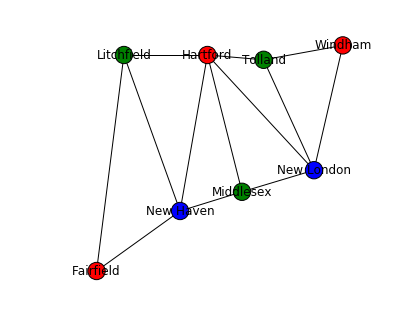

In [12]:
connecticut_colors = color_map( connecticut, ["red", "blue", "green"], trace=True)
print connecticut_colors
if connecticut_colors:
    draw_map( connecticut, (5,4), [color[1] for color in connecticut_colors])

In [13]:
#europe_colors = color_map( europe, ["red", "blue", "green", "yellow"])
#draw_map( europe, (10,8), [color[1] for color in europe_colors])

{'Turkey': 'red', 'Italy': 'green', 'Czech Republic': 'green', 'Lithuania': 'green', 'Luxembourg': 'green', 'France': 'blue', 'Bosnia Herzegovina': 'red', 'Georgia': 'yellow', 'Slovakia': 'yellow', 'Ireland': 'blue', 'Norway': 'red', 'Belarus': 'red', 'Iceland': 'yellow', 'Montenegro': 'yellow', 'Slovenia': 'red', 'Germany': 'red', 'Armenia': 'green', 'Belgium': 'yellow', 'Spain': 'red', 'Azerbaijan': 'blue', 'Ukraine': 'red', 'Netherlands': 'red', 'Denmark': 'yellow', 'Poland': 'blue', 'Finland': 'yellow', 'Macedonia': 'red', 'Moldova': 'green', 'Liechtenstein': 'green', 'Latvia': 'yellow', 'Croatia': 'yellow', 'Malta': 'red', 'Switzerland': 'yellow', 'Russia': 'green', 'Bulgaria': 'green', 'Romania': 'yellow', 'Albania': 'blue', 'Portugal': 'green', 'Estonia': 'blue', 'Kosovo': 'green', 'Serbia': 'blue', 'Sweden': 'green', 'United Kingdom': 'green', 'Austria': 'blue', 'Greece': 'yellow', 'Hungary': 'green', 'Cyprus': 'blue'}


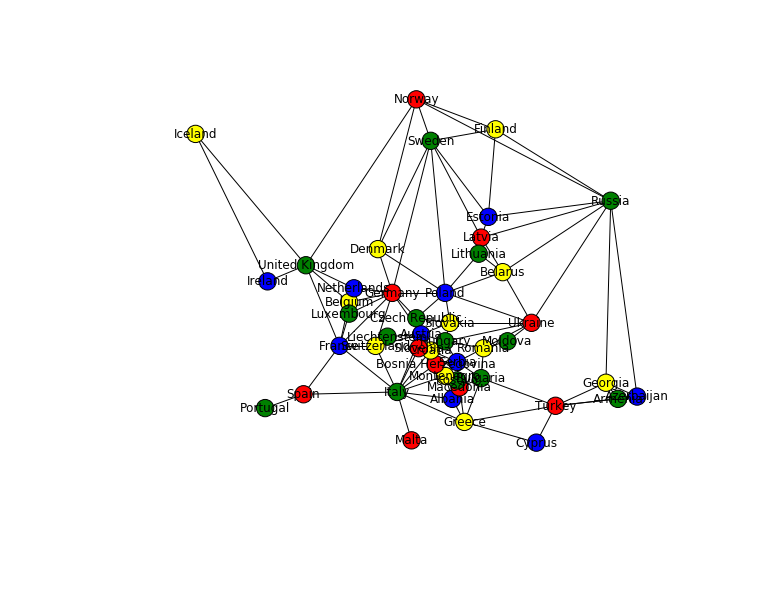

In [14]:
europe_colors = color_map2( europe, ["red", "blue", "green", "yellow"])
if europe_colors:
    draw_map( europe, (10,8), [color[1] for color in europe_colors])

In [15]:
#europe_colors = color_map( europe, ["red", "blue", "green"])
#if europe_colors:
#    draw_map( europe, (10,8), [color[1] for color in europe_colors])

In [16]:
#europe_colors = color_map2( europe, ["red", "blue", "green"])
#if europe_colors:
#    draw_map( europe, (10,8), [color[1] for color in europe_colors])